In [1]:
# import Libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Quincy/question 7.csv')

In [3]:
data.head(5)

,time,date,accident_severity,day_of_week,weather_conditions,light_conditions,casualty_severity,casualty_class,age_of_casualty,vehicle_type,age_band_of_casualty,road_surface_conditions,Year
0,09:00,04/02/2020,3,3,9,1,3,3,31,9,6,9,2020
1,13:55,27/04/2020,3,2,1,1,3,3,2,9,1,1,2020
2,13:55,27/04/2020,3,2,1,1,3,3,4,9,1,1,2020
3,01:25,01/01/2020,3,4,1,4,3,3,23,9,5,2,2020
4,01:50,01/01/2020,2,4,1,4,2,3,47,8,8,1,2020


In [4]:
data.isnull().sum()

time                       0
date                       0
accident_severity          0
day_of_week                0
weather_conditions         0
light_conditions           0
casualty_severity          0
casualty_class             0
age_of_casualty            0
vehicle_type               0
age_band_of_casualty       0
road_surface_conditions    0
Year                       0
dtype: int64

In [5]:
data.dtypes

time                       object
date                       object
accident_severity           int64
day_of_week                 int64
weather_conditions          int64
light_conditions            int64
casualty_severity           int64
casualty_class              int64
age_of_casualty             int64
vehicle_type                int64
age_band_of_casualty        int64
road_surface_conditions     int64
Year                        int64
dtype: object

In [6]:
# convert the time column to int
data['time'] = pd.to_datetime(data['time']).dt.hour
data['date'] = pd.to_datetime(data['time']).dt.hour

<Axes: xlabel='casualty_severity', ylabel='count'>

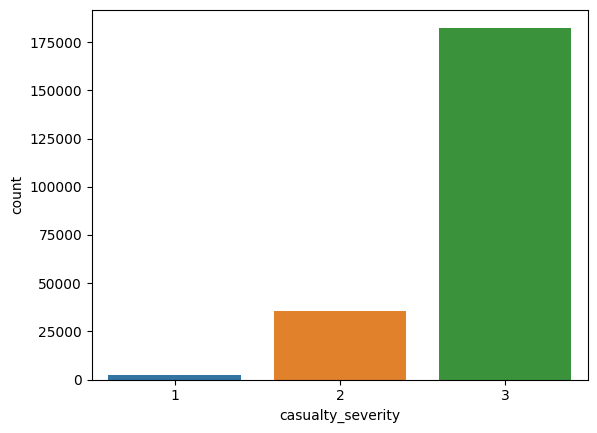

In [7]:
# Checking if there is imbalance in the target variable
sns.countplot(x = 'casualty_severity', data = data)

In [8]:
smote = SMOTE(random_state = 10)
data, data['casualty_severity'] = smote.fit_resample(data, data['casualty_severity'])


<Axes: xlabel='casualty_severity', ylabel='count'>

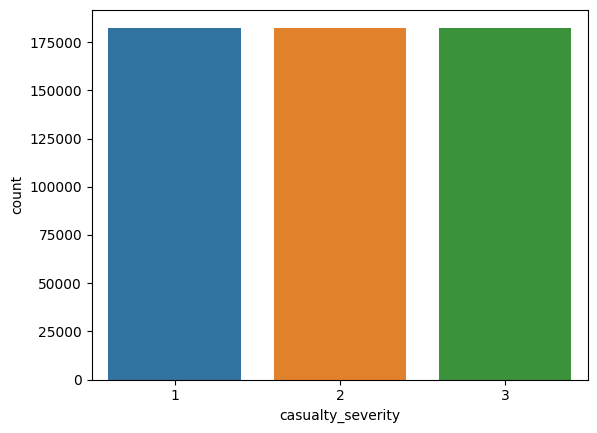

In [9]:
# Check again to see if it has been resampled to an evenly distribution
sns.countplot(x = 'casualty_severity', data = data)

In [10]:
y = data['casualty_severity']
data = data.drop(['casualty_severity','Year'], axis = 1)

In [11]:
# Scale the data
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25)

In [12]:
# Create a logistic regression model
model = LogisticRegression()

# Define the hyperparameters that you want to tune
param_grid = {'penalty': ['l1','l2'], 'C': [0.01, 0.1, 1, 10, 100]}

In [13]:
# Use GridSearchCV to find the best hyperparameters for your model
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Use the best model to make predictions on the test set
y_pred = grid_search.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9708258462257673

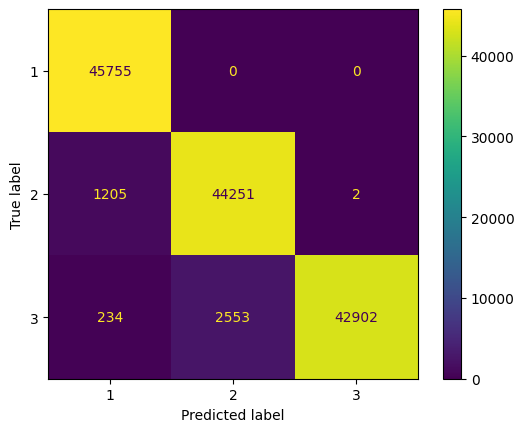

In [16]:
# Confusion matrix
cm= confusion_matrix(y_test, y_pred, labels=grid_search.classes_)

CMD= ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels = grid_search.classes_)

CMD.plot()